In [1]:
import numpy as np
import pandas as pd
from sklearn. preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import Perceptron  # New Library of Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load iris dataset for building perceptron model
iris = datasets.load_iris()


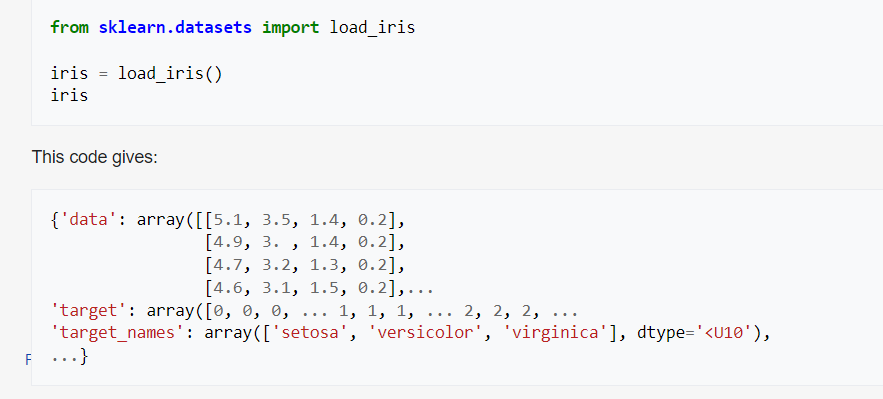

In [3]:
# Creating X and Y
X = iris.data
y = iris.target


In [4]:
# Feature Scaling- in percentron model/ deeplearning model do feature scaling- mandatory
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [5]:
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
# Split the data in train test
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size = .70, random_state = 101)

In [7]:
# create model usiing Perceptron 

per_model = Perceptron(random_state = 101)

In [8]:
per_model.fit(X_train,y_train)

Perceptron(random_state=101)

In [9]:
# Predict with the model
y_pred_train = per_model.predict(X_train)
y_pred_test = per_model.predict(X_test)

In [10]:
# classfication_report
print(classification_report(y_train, y_pred_train))
print('#####'*20)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.86      0.75      0.80        16
           2       0.84      0.94      0.89        17

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.86        45

####################################################################################################
              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.60      0.82      0.69        34
           2       0.84      0.79      0.81        33

    accuracy                           0.76       105
   macro avg       0.80      0.77      0.77       105
weighted avg       0.81      0.76      0.77       105



In [11]:
# confusion_matrix
print(confusion_matrix(y_train, y_pred_train))
print('#####'*20)
print(confusion_matrix(y_test, y_pred_test))

[[11  1  0]
 [ 1 12  3]
 [ 0  1 16]]
####################################################################################################
[[26 12  0]
 [ 1 28  5]
 [ 0  7 26]]


In [12]:
# Accuracy  Score # Varinace between train and test id more than 5 points. thus we will K Fold method
print(accuracy_score(y_train, y_pred_train))
print('#####'*20)
accuracy_score(y_test, y_pred_test)

0.8666666666666667
####################################################################################################


0.7619047619047619

In [13]:
# K Fold
from sklearn.model_selection import cross_val_score

In [14]:
accuracy = cross_val_score( per_model,X_test, y_test, cv =10)

In [15]:
accuracy.mean()

0.7827272727272727

# Random Forest Classification Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [19]:
y_pred_rfc_train = rfc.predict(X_train)
y_pred_rfc_test = rfc.predict(X_test)

In [22]:
print(accuracy_score(y_train, y_pred_rfc_train ))

print("#########"*5)

print(accuracy_score(y_test, y_pred_rfc_test))

1.0
#############################################
0.9333333333333333


In [23]:
print(classification_report(y_train, y_pred_rfc_train))

print("#########"*5)

print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

#############################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.85      0.97      0.90        34
           2       0.96      0.82      0.89        33

    accuracy                           0.93       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105



# Conclusion:
### Random Forest is giving better accuracy in test and train 